# Assignment 3 #

Note. Not all of these exercises have autochecking. This is because it is hard to verify plots by code. I will check these manually. In addition, the probability based algorithms may give different results depending on the seed, so I will grade these by hand as well. 

Run the cell of code below before starting the assignment.

In [1]:
import assignment3checker as ck

## Exercise 1 ##
### Recurrence Relation ###
Consider the recurrence relation $R_n = R_{n-1}^2 + 3n$ for $n\geq1$, with $R_0 = 0$. Create a function to find $R_n$ given $n$ as an input.

In [2]:
def problem1(n):
    '''Find the value of R_n given an integer n >= 0.
    
    inputs:
        n: An non-negative int
    outputs:
        R_n: The value of R_n in the recursion relation defined in the problem statement.
        '''
    
    def recursion(k):
        '''Using recursion, we can define the recursion relation as a function here.'''
        #Base Case
        if k == 0:
            return 0
        #Recursion definition
        else:
            return recursion(k-1)**2 + 3*k
    
    #This is to find R_n for the checker. In most programs, we would leave R_n as the final line.
    R_n = recursion(n)
    
    return R_n


In [3]:
ck.p1(problem1)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Exercise 2 ##
### Counting Nested Subsets ###

Suppose you are given an input that contains some combination of lists and integers, lists, and strings contained in the lists. Given an input list, nest, determine how many lists are contained within nest, between all layers.

Example: Consider nest = [1,[1,[23,[2,1]],[5], [] ]]. Then we should count 6 total lists (this is seen most easily by humans by counting the number of '[' brackets).

In [4]:
def problem2(nest):
    '''Find the number of lists included in nest.
    
    inputs:
        nest: A list, string, or int that will contain some combination of nested lists, strings, and ints.
    outputs:
        count: The number of nested lists
        '''
    
    
    def listnest(nest):
        
        count = 0
        
        #If we have a list add 1 to the count, and check inside of this list for more lists
        if type(nest) == list:
            
            count += 1
            for x in nest:
                count += listnest(x)
            
            return count
        
        #If we do not have a list, return 0
        else:
            return 0
    
    #This is to find the count for the checker. In most programs, we would leave count as the final line.
    count = listnest(nest)
    
    return count


In [5]:
ck.p2(problem2)

Test case 1 was successful.
Test case 2 was successful.
Test case 3 was successful.
Test case 4 was successful.
Test case 5 was successful.
Test case 6 was successful.


## Exercise 3 ##
### Plotting Curves ###

Plot the following curves in Matplotlib. All three curves should appear on the same plot, the colors should be the same as listed, and you should consider a range of $x$ values from $-10$ to $10$.
1. $y=2x+3$ Plot this one in red
2. $y=-3x^2 + 2x - 3$ Plot this one in blue
3. $y=|x|$ Plot this one in green

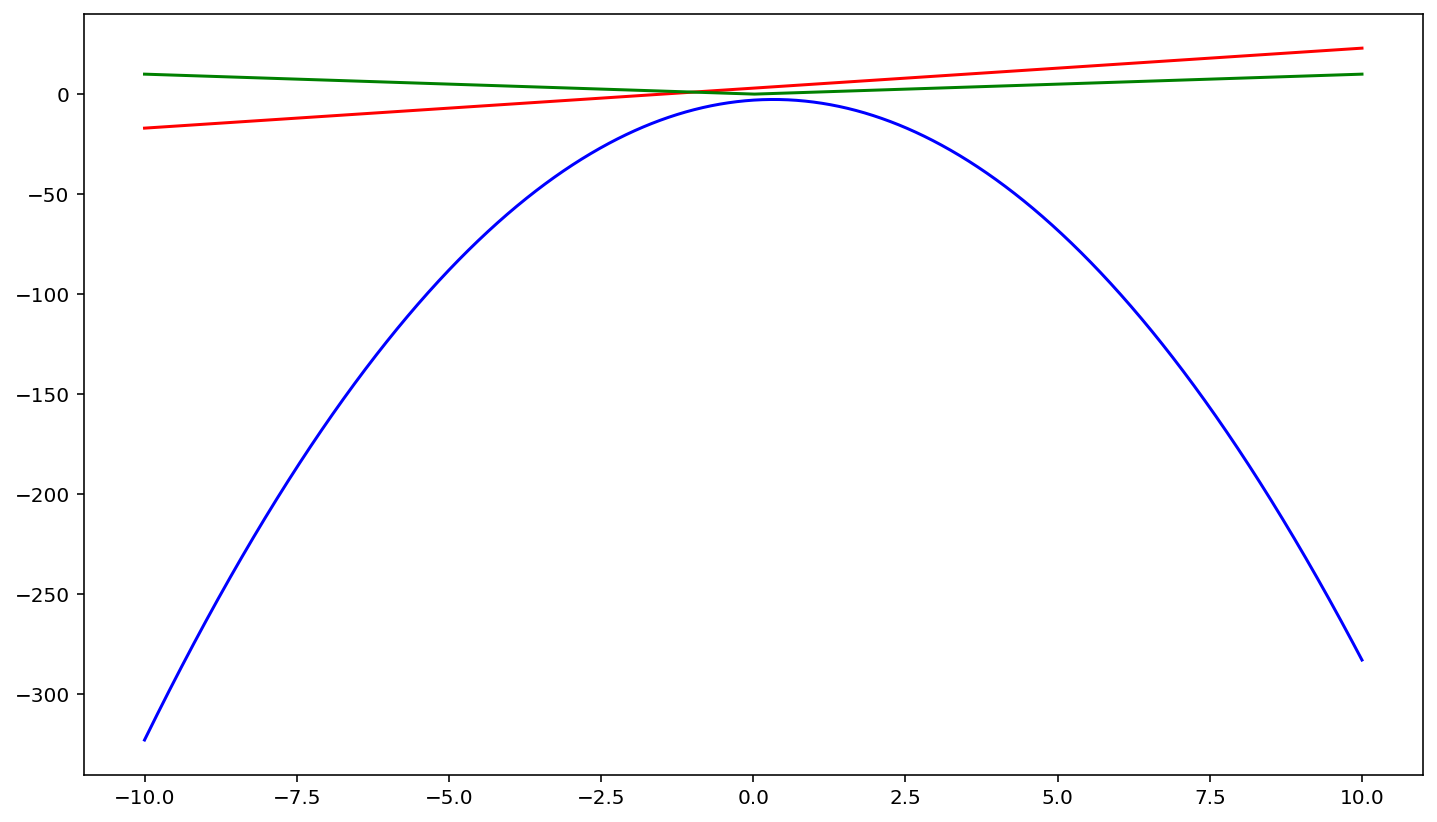

In [6]:
import matplotlib.pyplot as plt

#Generate the x and y values as lists
xs = [i/100 for i in range(-1000,1001)]
ys1 = [2*x+3 for x in xs]
ys2 = [-3*x**2+2*x-3 for x in xs]
ys3 = [abs(x) for x in xs]

#Plot each of the curves
plt.plot(xs,ys1,color='red')
plt.plot(xs,ys2,color='blue')
plt.plot(xs,ys3,color='green')
plt.show()
plt.close()

## Exercise 4-6 ##
### Card Simulations ###

In the next series of exercises, we will use the random library to simulate probabilities with cards. We will break this process into smaller sub-tasks. 

## Exercise 4 ##
### Build the Deck ###
We will start by making a list of cards. Each card will be represented by a string of the form 'xy', where x encodes the value of the card, and y encodes the suit (Note these are case sensitive). Below is the list of all the x and y values we will use:

### x ###
$$x\in\{'a','2','3','4','5','6','7','8','9','t','j',q','k'\}$$
$$y\in\{'c','d','h','s'\}$$

Create code to generate this 'deck' of cards as a list. Your final answer should be of the form:
['ac','td','kh','7c',$\dots$]

(Note, you could copy the answer from the assignment3checker.py file, but for full credit, you need to use loops, list comprehension, or some other method to generate this list.)

In [7]:
def problem4():
    '''This function will generate the list of cards, with each card stored as a string in the format given above.
    
    inputs:
        none
    outputs:
        deck: This is the list we are trying to generate. Note that the strings are case sensitive, and all characters should be lower case.'''
    
    xs = ['a','2','3','4','5','6','7','8','9','t','j','q','k']
    ys = ['c','d','h','s']
    deck = [x+y for x in xs for y in ys]
    
    return deck

In [8]:
ck.p4(problem4)

This is correct.


## Exercise 5 ##
### Simulating Draw Scores ###

A card has a score calculated by summing the value of the cards value and suit. These values are listed below
### x values ###
* 'a' = 1
* '2' = 2
* '3' = 3
* '4' = 4
* '5' = 5
* '6' = 6
* '7' = 7
* '8' = 8
* '9' = 9
* 't' = 10
* 'j' = 11
* 'q' = 12
* 'k' = 13

### y values ###
* 'c' = 1
* 'd' = 2
* 'h' = 3
* 's' = 4

If $5$ cards are drawn from a deck without replacement, we say the draw score is the sum of the scores of all $5$ drawn cards. For example, if the five drawn cards are 'as','2h','jd','7c','9c', then the draw score will be:
$$ (1+4) + (2+3) +(11+2)+(7+1) + (9+1) = 5 + 5 + 13 + 8 + 10 = 41$$

Create code to draw $5$ random cards from the deck and compute their draw score. (You should use the deck list from the previous exercise to help).

In [9]:
import random as random

def score(card):
    '''This function will find the score of a single card.
    
    inputs:
        card: This is the card to score. Each card will be represented as a two character string of the form given above
    outputs:
        score: This is the score of the input card using the rule given above.'''
    
    #Get the information from the card
    value, suit =card[0],card[1]
    
    #These dicts will be used in scoring the card
    valdict = {'a':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'t':10,'j':11,'q':12,'k':13}
    suitdict = {'c':1,'d':2,'h':3,'s':4}
    
    #Compute and return the score
    return valdict[value] + suitdict[suit]

def score5(deck):
    '''This will compute the score of 5 randomly selected cards from deck.
    
    inputs:
        deck: This is the deck of cards we built in exercise 4
    outputs:
        score5: This is the score of the 5 selected cards'''
    
    #Shuffle the deck
    random.shuffle(deck)
    
    #Add the scores of the 5 cards
    score5 = 0
    for card in deck[:5]:
        score5 += score(card)
        
    return score5

#Generate the deck
deck = problem4()
#Example output of score (This is not a shuffled deck, so we are always scoring the king of spades)
print(score(deck[-1]))
#Example output of score5. This will change with each run of the cell, as it always shuffles the deck
print(score5(deck))

17
46


## Exercise 6 ##
### The Distribution of Draw Scores ###
Using the function from Exercise 5, simulate $10,000$ draws and record the draw scores. Using these scores, create a histogram of the scores using Matplotlib.

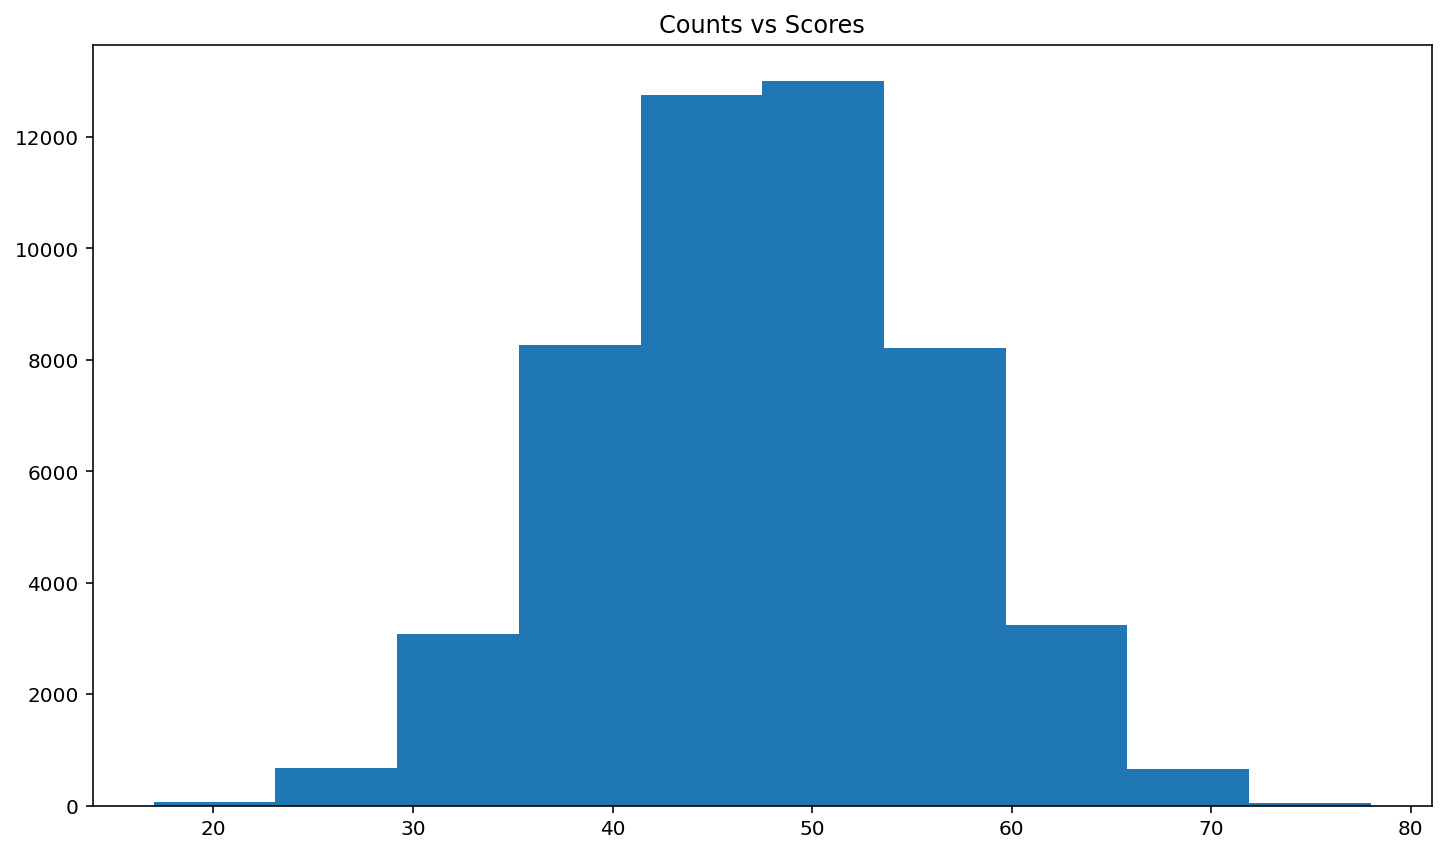

In [10]:
#Import the libraries (in case you haven't already)
import random as random
import matplotlib.pyplot as plt

#Generate the deck using the problem4 function
deck = problem4()

#Generate 10000 score5s
scores = []
for i in range(10000):
    scores.append(score5(deck))

#Plot the histogram
plt.hist(scores)
plt.title('Counts vs Scores')
plt.show()
plt.close()

## Bonus Problem 1 ##
### Blackjack Simulation ###
The rules of blackjack are listed here on Wikipedia https://en.wikipedia.org/wiki/Blackjack. We are going to do some simulations with blackjack. Use code to answer the following questions for a single deck game of blackjack.
1. If the dealer must stand at $17$ and above (including soft $17$), and the dealer must hit whenever their hand is at $16$ or below, find the approximate proportion of hands where the dealer busts.
2. If the rules now require the dealer to hit on a soft $17$, but are the same otherwise, then find the approximate proportion of hands where the dealer busts.

For each of these, run at least $10,000$ trials.

In [11]:
def bonusproblem1():
    '''This will return the proportions of hands where the dealer busts in scenarios 1 and 2.
    
    inputs:
        none
    outputs:
        prop1: The proportion of hands where the dealer busts in scenario 1.
        prop2: The proportion of hands where the dealer busts in scenario 2.
        '''
    import random as random
    
    numtrials = 10000
    
    #Scenario 1
    
    def genscenario1(numtrials):
        '''This will return the scores from numtrials of scenario 1 hands
        inputs:
            numtrials: This is the number of trials to simulate
        outputs:
            scores: These are the scores from the trials'''
        
        scores = []
        for i in range(numtrials):
            #We already made a function to generate a deck of cards
            deck = problem4()
            #Shuffle the deck
            random.shuffle(deck)

            #This is the value of the hand
            score = 0

            #This will record the number of aces being used as 11s.
            acheck = 0

            #This will keep drawing cards until the dealer wins or busts
            while not (17 <= score <=21) and not(acheck == 0 and score > 21):

                #This gets the value of the drawn card. Suit doesn't matter
                val = deck.pop(0)[0]

                #Add the number cards to the score
                if val in ['2','3','4','5','6','7','8','9']:
                    score += int(val)

                #Add the face cards to the score
                elif val in ['t','j','q','k']:
                    score += 10

                #Add the aces to the score
                else:
                    #First use 11 if possible
                    if score + 11 <= 21:
                        score += 11
                        acheck += 1

                    #Use 1 if needed
                    else:
                        score += 1

                #Check for aces to be turned into 1s, if needed
                if score >21 and acheck > 0:
                        while score > 21 and acheck > 0:
                            score -= 10
                            acheck -= 1

            scores.append(score)

        return scores
    
    #Scenario 2
    
    def genscenario2(numtrials):
        '''This will return the scores from numtrials of scenario 2 hands
        inputs:
            numtrials: This is the number of trials to simulate
        outputs:
            scores: These are the scores from the trials'''

        scores = []
        for i in range(numtrials):
            #We already made a function to generate a deck of cards
            deck = problem4()
            #Shuffle the deck
            random.shuffle(deck)

            #This is the value of the hand
            score = 0

            #This will record the number of aces being used as 11s.
            acheck = 0
            
            #This will keep drawing cards until the dealer wins or busts
            while not (18 <= score <=21) and not(acheck == 0 and score > 21) and not(score == 17 and acheck == 0):

                #This gets the value of the drawn card. Suit doesn't matter
                val = deck.pop(0)[0]
                
                #Add the number cards to the score
                if val in ['2','3','4','5','6','7','8','9']:
                    score += int(val)

                #Add the face cards to the score
                elif val in ['t','j','q','k']:
                    score += 10

                #Add the aces to the score
                else:
                    #First use 11 if possible
                    if score + 11 <= 21:
                        score += 11
                        acheck += 1

                    #Use 1 if needed
                    else:
                        score += 1

                #Check for aces to be turned into 1s if needed
                if score >21 and acheck > 0:
                        while score > 21 and acheck > 0:
                            score -= 10
                            acheck -= 1
                
            scores.append(score)

        return scores
    
    #Generate the trials
    scores1, scores2 = genscenario1(numtrials),genscenario2(numtrials)
    
    #Count how many times the dealer busts
    counts1 = [1 for x in scores1 if x>21]
    c1 = sum(counts1)
    
    counts2 = [1 for x in scores2 if x>21]
    c2 = sum(counts2)
    
    #Find the proportions
    prop1 = c1/numtrials
    
    prop2 = c2/numtrials
    
    return prop1,prop2

print(bonusproblem1())

(0.2797, 0.2824)


Running the cell below will show the sample means I found after running $100$ trials with sample sizes of $10,000$ hands each. Your answer may vary depending on the seed.

In [12]:
ck.b1()

Scenario 1 has an approximate proportion of 0.284046
Scenario 2 has an approximate proportion of 0.287311


## Bonus Problem 2 ##
### More Blackjack Simulation ###
For each of the two cases above, find the average value of the dealer's hand when they stand (or bust). 

In [13]:
def bonusproblem2():
    '''This will return the average value of the dealer's hand after the dealer stands or busts.
    
    inputs:
        none
    outputs:
        av1:The average value of the dealer's hand in scenario 1.
        av2:The average value of the dealer's hand in scenario 2.'''
    
    #We will reuse the generation code from the previous bonus problem.
    import random as random
    numtrials = 10000
    
    #Scenario 1
    
    def genscenario1(numtrials):
        '''This will return the scores from numtrials of scenario 1 hands
        inputs:
            numtrials: This is the number of trials to simulate
        outputs:
            scores: These are the scores from the trials'''
        
        scores = []
        for i in range(numtrials):
            #We already made a function to generate a deck of cards
            deck = problem4()
            #Shuffle the deck
            random.shuffle(deck)

            #This is the value of the hand
            score = 0

            #This will record the number of aces being used as 11s.
            acheck = 0

            #This will keep drawing cards until the dealer wins or busts
            while not (17 <= score <=21) and not(acheck == 0 and score > 21):

                #This gets the value of the drawn card. Suit doesn't matter
                val = deck.pop(0)[0]

                #Add the number cards to the score
                if val in ['2','3','4','5','6','7','8','9']:
                    score += int(val)

                #Add the face cards to the score
                elif val in ['t','j','q','k']:
                    score += 10

                #Add the aces to the score
                else:
                    #First use 11 if possible
                    if score + 11 <= 21:
                        score += 11
                        acheck += 1

                    #Use 1 if needed
                    else:
                        score += 1

                #Check for aces to be turned into 1s, if needed
                if score >21 and acheck > 0:
                        while score > 21 and acheck > 0:
                            score -= 10
                            acheck -= 1

            scores.append(score)

        return scores
    
    #Scenario 2
    
    def genscenario2(numtrials):
        '''This will return the scores from numtrials of scenario 2 hands
        inputs:
            numtrials: This is the number of trials to simulate
        outputs:
            scores: These are the scores from the trials'''

        scores = []
        for i in range(numtrials):
            #We already made a function to generate a deck of cards
            deck = problem4()
            #Shuffle the deck
            random.shuffle(deck)

            #This is the value of the hand
            score = 0

            #This will record the number of aces being used as 11s.
            acheck = 0
            
            #This will keep drawing cards until the dealer wins or busts
            while not (18 <= score <=21) and not(acheck == 0 and score > 21) and not(score == 17 and acheck == 0):

                #This gets the value of the drawn card. Suit doesn't matter
                val = deck.pop(0)[0]
                
                #Add the number cards to the score
                if val in ['2','3','4','5','6','7','8','9']:
                    score += int(val)

                #Add the face cards to the score
                elif val in ['t','j','q','k']:
                    score += 10

                #Add the aces to the score
                else:
                    #First use 11 if possible
                    if score + 11 <= 21:
                        score += 11
                        acheck += 1

                    #Use 1 if needed
                    else:
                        score += 1

                #Check for aces to be turned into 1s, if needed
                if score >21 and acheck > 0:
                        while score > 21 and acheck > 0:
                            score -= 10
                            acheck -= 1
                
            scores.append(score)

        return scores
    
    #Get the scores
    scores1, scores2 = genscenario1(numtrials),genscenario2(numtrials)
    
    #Find the averages
    av1 = sum(scores1)/numtrials
    av2 = sum(scores2)/numtrials
    
    return av1,av2

print(bonusproblem2())

(20.2967, 20.3761)


Running the cell below will show the sample means I found after running 100 trials with sample sizes of 10,000 hands each. Your answer may vary depending on the seed.

In [14]:
ck.b2()

Scenario 1 has an approximate proportion of 20.326892
Scenario 2 has an approximate proportion of 20.367076
